# **Problema de Optimización Lineal**

Maximizar  
$$
2000 x + 3000 y
$$

Sujeto a  
$$
\begin{aligned}
R_0: & \quad x + y \leq 80 \\
R_1: & \quad x + 2y \leq 100 \\
R_2: & \quad y \leq 40
\end{aligned}
$$

con $ x, y \geq 0 $.

## *Solución usando Simplex:*

Se transforman las desigualdades en igualdades usando las variables auxiliares:

$$
\begin{aligned}
x + y + s_1 &= 80 \quad & (R_0) \\
x + 2 y + s_2 &= 100 \quad & (R_1) \\
y + s_3 &= 40 \quad & (R_2) \\
x, y, s_1, s_2, s_3 &\geq 0
\end{aligned}
$$

Además de reorganizar la función objetivo:

$$
Z - 2000x - 3000y = 0
$$

Con esto se reorganiza la tabla para las iteraciones del método:

**1era:**

\begin{array}{c|cccccc}
\text{Base} & x & y & s_1 & s_2 & s_3 & \text{RHS} \\
\hline
s_1 & 1 & 1 & 1 & 0 & 0 & 80 \\
s_2 & 1 & 2 & 0 & 1 & 0 & 100 \\
s_3 & 0 & 1 & 0 & 0 & 1 & 40 \\
\hline
\textbf{Z} & -2000 & -3000 & 0 & 0 & 0 & 0 \\
\end{array}

(*RHS*: Right Hand Side)

De ahí se identifica que la columna pivote sería la de $y$, mientras que para la fila se utilizan las razones entre el RHS y el término de esta columna:

\begin{array}{c|cc|c|c}
\text{Base} & x & y & \text{RHS} & \frac{\text{RHS}}{\text{coef. de } y} \\
\hline
s_1 & 1 & 1 & 80 & \frac{80}{1} = 80 \\
s_2 & 1 & 2 & 100 & \frac{100}{2} = 50 \\
s_3 & 0 & 1 & 40 & \frac{40}{1} = 40 \\
\end{array}

De ahí se llega a que la fila pivote es la última, la de $s_3$, por lo que se procede a realizar las siguientes operaciones sobre la tabla: Se normaliza la fila de $s_3$ cuya variable se cambia por la de $y$, después se cancelan los demás términos de la fila $y$ mediante operaciones entre filas.

\begin{array}{c|cccccc}
\text{Base} & x & y & s_1 & s_2 & s_3 & \text{RHS} \\
\hline
s_1 & 1 & 0 & 1 & 0 & -1 & 40 \\
s_2 & 1 & 0 & 0 & 1 & -2 & 20 \\
y   & 0 & 1 & 0 & 0 & 1 & 40 \\
\hline
\textbf{Z} & -2000 & 0 & 0 & 0 & 3000 & 120000 \\
\end{array}

Se identifica un único término negativo en la fila $Z$, por lo que la columna pivote es la de $x$, mientras que la fila será claramente la de $s_2$, note que no se toma en cuenta la fila de $y$. Con esto dado, se tiene la siguiente tabla:

\begin{array}{c|cccccc}
\text{Base} & x & y & s_1 & s_2 & s_3 & \text{RHS} \\
\hline
s_1 & 0 & 0 & 1 & -1 & 1 & 20 \\
x   & 1 & 0 & 0 & 1 & -2 & 20 \\
y   & 0 & 1 & 0 & 0 & 1 & 40 \\
\hline
\textbf{Z} & 0 & 0 & 0 & 2000 & -1000 & 160000 \\
\end{array}

Note que nos queda un último elemento negativo en la fila de $Z$, entonces, se tendrá que aplicar una iteración más, donde la columna pivote es $s_3$, mientras que para hallar la fila tenemos:

\begin{array}{c|c|c}
\text{Base} & \text{RHS} & \frac{\text{RHS}}{\text{coef. de } s_3} \\
\hline
s_1 & 20 & \frac{20}{1} = 20 \\
x   & 20 & \frac{20}{-2} < 0 \\
y   & 40 & \frac{40}{1} = 40 \\
\end{array}

Donde se escoge a la fila $s_1$, note que $x$ es negativo, por lo que no se tiene en cuenta. Finalmente con esto llegamos al último estado de la tabla:

\begin{array}{c|ccccc|c}
\text{Base} & x & y & s_1 & s_2 & s_3 & \text{RHS} \\
\hline
s_3 & 0 & 0 & 1 & -1 & 1 & 20 \\
x   & 1 & 0 & 2 & -1 & 0 & 60 \\
y   & 0 & 1 & -1 & 1 & 0 & 20 \\
\hline
\textbf{Z} & 0 & 0 & 1000 & 1000 & 0 & 180000 \\
\end{array}

Por tanto, la solución óptima ocurre con:

$$
x = 60 \quad y=20
$$

Y entonces:

$$
Z = 180000
$$


## *Solución usando el método gráfico:*

Usando geogebra se pudieron graficar las 5 condiciones y determinar mediante la variación manual de la función de costo el punto máximo de esta:

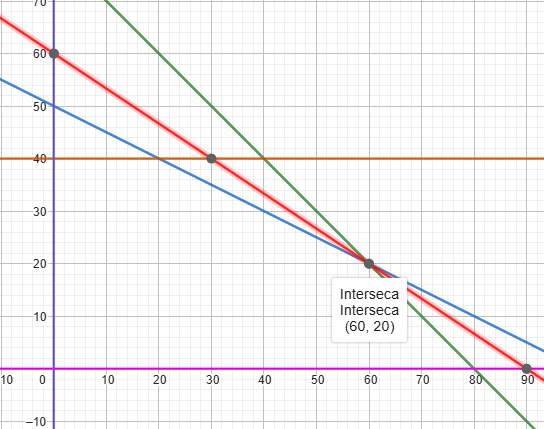

Para ilustrarlo mejor, se muestra una gráfica de python donde se indica además la región factible.

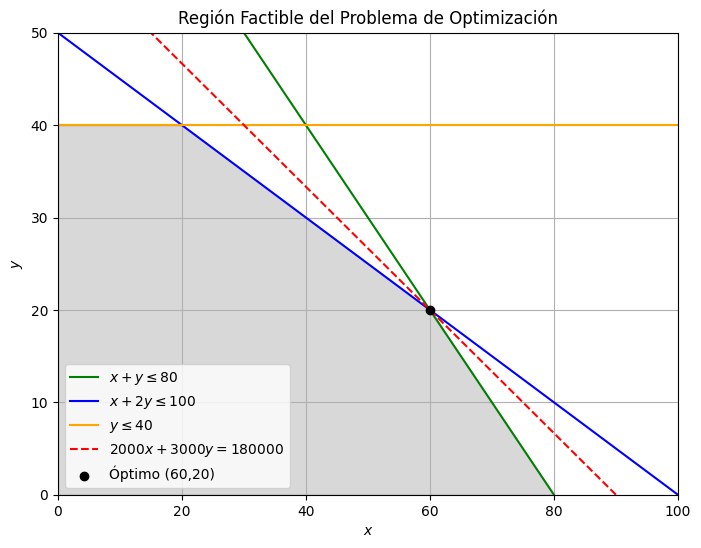

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los valores de x
x = np.linspace(0, 100, 200)

# Definir las restricciones
y_1 = 80 - x  # x + y <= 80
y_2 = (100 - x) / 2  # x + 2y <= 100
y_3 = np.full_like(x, 40)  # y <= 40

# Calcular el valor de z en el punto óptimo
x_opt, y_opt = 60, 20
z_opt = 2000 * x_opt + 3000 * y_opt

# Definir la recta de nivel de la función objetivo para el valor óptimo
z_line = (z_opt - 2000 * x) / 3000

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.plot(x, y_1, label=r'$x + y \leq 80$', color='green')
plt.plot(x, y_2, label=r'$x + 2y \leq 100$', color='blue')
plt.plot(x, y_3, label=r'$y \leq 40$', color='orange')
plt.plot(x, z_line, '--', label=f'$2000x + 3000y = {z_opt}$', color='red')

# Rellenar la región factible
plt.fill_between(x, np.minimum(np.minimum(y_1, y_2), y_3), 0, where=(np.minimum(np.minimum(y_1, y_2), y_3) >= 0), color='gray', alpha=0.3)

# Marcar el punto óptimo
plt.scatter([x_opt], [y_opt], color='black', zorder=3, label='Óptimo (60,20)')

# Etiquetas y límites
plt.xlim(0, 100)
plt.ylim(0, 50)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Región Factible del Problema de Optimización')
plt.legend()
plt.grid()
plt.show()


## *Solución usando Gurobipy*
Instalar librería de *Gurobipy*:

In [ ]:
pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 65.6 MB/s eta 0:00:00


Importarla

In [ ]:
from gurobipy import *

**Descripción del modelo**

In [ ]:
Mod1 = Model("Yepeto")
x = Mod1.addVar(vtype=GRB.INTEGER, name = "x")
y = Mod1.addVar(vtype=GRB.INTEGER, name = "y")

# Objetivo
Mod1.setObjective(2000*x + 3000*y, GRB.MAXIMIZE)
# Restricciones
Mod1.addConstr(x + y <= 80)
Mod1.addConstr(x + 2*y <= 100)
Mod1.addConstr(y <= 40)

Mod1.update()
Mod1.display()

Maximize
  2000.0 x + 3000.0 y
Subject To
  R0: x + y <= 80
  R1: x + 2.0 y <= 100
  R2: y <= 40
General Integers
  ['x', 'y']


<ipython-input-19-6aa88d2d964d>:13: DeprecationWarning: Model.display() is deprecated
  Mod1.display()


Optimizar la función objetivo dadas las restricciones

In [ ]:
Mod1.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD EPYC 7B12, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 3 rows, 2 columns and 5 nonzeros
Model fingerprint: 0x5a4e56f4
Variable types: 0 continuous, 2 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [2e+03, 3e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+01, 1e+02]
Found heuristic solution: objective 160000.00000
Presolve removed 1 rows and 0 columns
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros
Variable types: 0 continuous, 2 integer (0 binary)

Root relaxation: objective 1.800000e+05, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    180000.00000 18

Ver las salidas de la optimización

In [ ]:
Mod1.getVars()

[<gurobi.Var x (value 60.0)>, <gurobi.Var y (value 20.0)>]